Solution 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [18]:
# intialisation
X_0 = np.array([1,1]) 
epsilon = 10**(-16)

In [24]:
# definition de la fonction f
def f(x, y):
    # return 4*x**2 - 4*x*y + 4*x + 2*y**2 +2
    return 1/4*x**4 - 1/2*x**2 +1/4*y**4 -1/2*y**2 + 2*x*y

In [12]:
# definition du gradient de f
def gradient(X):
    # return np.array([8*X[0]-4*X[1]+4, -4*X[0]+4*X[1]])
    return np.array([X[0]**3-X[0]+2*X[1] , X[1]**3-X[1] + 2*X[0] ])

In [13]:
# definition du gradient de f
def hessiene(X):
    # return np.array([[8, -4 ] , [-4 ,4]])
    return np.array([[3*X[0]**2-1 , 2],[2 , 3*X[1]**2 - 1]])

In [6]:
def hessien_inv(X):
    return np.array([[1/4, 1/4 ] , [1/4 , 1/2]])

In [14]:
def norm(X):
    return np.linalg.norm( X)

In [15]:
def fit_gradient_descent(gradient  , X , optimal=False , epsilon=epsilon ):
    history = [X]
    grad_f = gradient(X)
    
    i = 0
    while norm(grad_f) > epsilon :
        h = -grad_f
        pas = (grad_f @ grad_f)/(hessiene(X) @ grad_f @ grad_f) if optimal else 1/6

        X = X + pas * h
        history = np.vstack((history, X))
        grad_f = gradient(X)
        i+=1
    print(f"> Finished in {i} iterations")
    return X ,history


        

In [9]:
def fit_newton_descent(gradient, hessian_inv, X, epsilon=epsilon):
    history = [X]
    grad_f = gradient(X)

    i = 0
    while norm(grad_f) > epsilon:

        h = -1 * hessian_inv(X) @ grad_f
        pas = 1

        X = X + pas * h
        history = np.vstack((history, X))
        grad_f = gradient(X)
        i += 1
    print(f"> Finished in {i} iterations")
    return X ,  history

In [19]:
# _, trace_fixe = fit_gradient_descent(gradient, X_0)
_, trace_optimal = fit_gradient_descent(gradient, X_0, optimal=True)
# _, trace_newton = fit_newton_descent(gradient, hessien_inv, X_0)

> Finished in 5 iterations


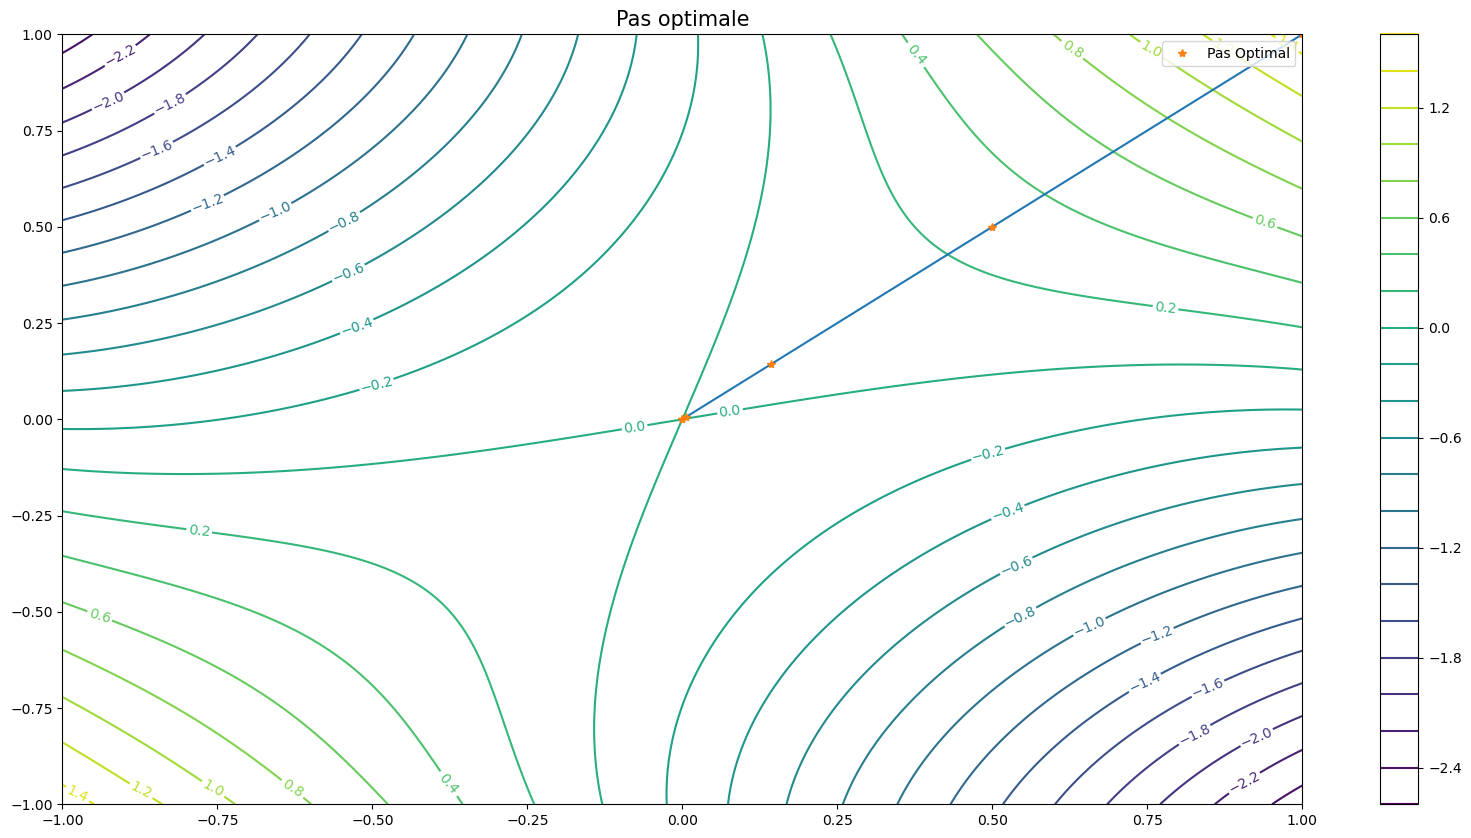

In [25]:
x1 = np.linspace(-1,1, 300)
x2 = np.linspace(-1, 1, 300)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)
fig = plt.figure(figsize = (20,10))
contours = plt.contour(X1, X2, Z, 20)
plt.clabel(contours, inline = True, fontsize = 10)
plt.title("Pas optimale", fontsize=15)

# plt.plot(trace_fixe[:, 0], trace_fixe[:, 1])
# plt.plot(trace_fixe[:, 0], trace_fixe[:, 1], "*" , label="Pas Fixe")

plt.plot(trace_optimal[:, 0], trace_optimal[:, 1])
plt.plot(trace_optimal[:, 0], trace_optimal[:, 1], "*" ,  label="Pas Optimal")

# plt.plot(trace_newton[:, 0], trace_newton[:, 1])
# plt.plot(trace_newton[:, 0], trace_newton[:, 1], "*", label="newton")


plt.colorbar()
plt.legend(loc = "upper right")
plt.show()